# Vertex AI Gemini 1.5 Pro 시작하기
- Created: 2024-11-07 (Thu)
- Updated: 2024-11-22 (Fri)

Source: https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_1_5_pro.ipynb

Link to the custom demo video
- https://youtu.be/NK3uOWT4rW4
- "Find a way to DevFest Cloud 2024"
- find-a-way-to-devfest-cloud-2024.mov

# 설정

In [1]:
!pip3 install --upgrade --quiet google-cloud-aiplatform

In [2]:
# Restart runtime
import sys

if "google.colab" in sys.modules:
    import IPython

    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

In [3]:
!gcloud config get-value project

vertex-workbench-notebook


In [4]:
# Set Google Cloud project information and initialize Vertex AI SDK
#   To get started using Vertex AI, you must have an existing Google Cloud project and enable the Vertex AI API.
import os
import vertexai

# Use subprocess to execute "gcloud config get-value project"
PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT") )
print( PROJECT_ID )

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")
print( LOCATION )

vertexai.init(project=PROJECT_ID, location=LOCATION)

vertex-workbench-notebook
us-central1


In [5]:
# Import libraries
import IPython.display
from vertexai.generative_models import (
    GenerationConfig,
    GenerativeModel,
    HarmBlockThreshold,
    HarmCategory,
    Part,
)

## 모델 로딩: Gemini 1.5 Pro

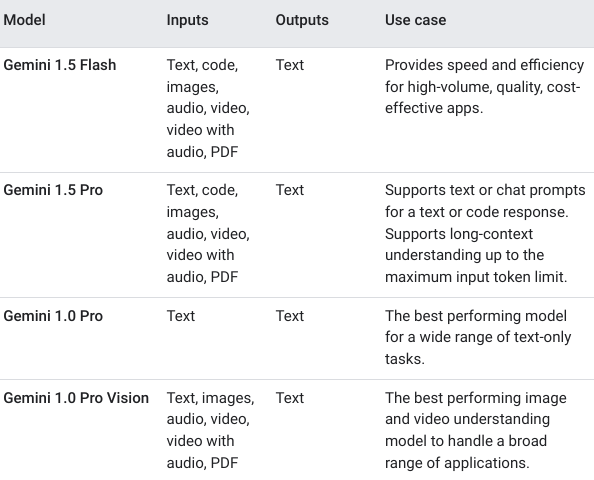

Source: [Gemini API models on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models)

In [6]:
# Load the Gemini 1.5 Pro model
MODEL_ID = "gemini-1.5-pro-002" # @param {type:"string"}
model    = GenerativeModel(MODEL_ID)

In [7]:
SYSTEM_INSTRUCTION ="You're a helpful language translator. Your mission is to translate text in English to Korean."
translator_model   = GenerativeModel(MODEL_ID, system_instruction=SYSTEM_INSTRUCTION)
# Model parameters
generation_config  = GenerationConfig( temperature=0.9, top_p=1.0, top_k=32, candidate_count=1, max_output_tokens=8192,)

# Safety filter settings
safety_settings = {
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
}

# 텍스트 이해
## 예: 영한 번역

### 입력 프롬프트 

In [8]:
prompt   = "Gemini 1.5 is a multimodal LLM that supports text, audio, images, video (with/without audio), PDF, and code."
contents = [prompt]

### 출력 (모델 응답)

In [9]:
response = translator_model.generate_content(
    contents,
    generation_config=generation_config,
    safety_settings=safety_settings,
)
print(f"\n{response.text}")


Gemini 1.5는 텍스트, 오디오, 이미지, 비디오(오디오 포함/미포함), PDF 및 코드를 지원하는 다중 모드 LLM입니다.



# 비디오 이해
Gemini 1.5 Pro는 비디오와 음성을 함께 처리하는 데 탁월한 능력을 보입니다.
- 긴 컨텍스트 사이즈로 매우 긴 텍스트, 비디오, 오디오 데이터를 기억하고 분석할 수 있습니다.

인터리빙: 비디오 프레임과 오디오 세그먼트를 순서대로 분석하여 전체적인 맥락을 이해합니다.
- 예: 영화의 한 장면을 보면서 동시에 대사를 듣고, 등장인물의 감정, 장면의 분위기, 이야기의 흐름 등을 종합적으로 파악할 수 있습니다.

이러한 기능은 영상 분석, 자막 생성, 콘텐츠 요약 등 다양한 분야에서 활용될 수 있습니다.

In [10]:
bucket          = "thekim-bucket-devfest-cloud-2024"
video_dir_file  = "videos/find-a-way-to-devfest-cloud-2024.mov"

video_file_path = f"{bucket}/{video_dir_file}"
video_file_uri  = f"gs://{video_file_path}"  # not used for embedding
video_file_url  = f"https://storage.cloud.google.com/{video_file_path}?authuser=4"

print(video_file_url)
IPython.display.Video(video_file_url, width=450)

https://storage.cloud.google.com/thekim-bucket-devfest-cloud-2024/videos/find-a-way-to-devfest-cloud-2024.mov?authuser=4


In [11]:
prompt     = "Describe the video. The description should include important things people say in the video."
video_file = Part.from_uri(video_file_uri, mime_type="video/mov")
contents   = [video_file, prompt]

response   = model.generate_content(contents)
print(response.text)

Here is a description of the video, including important things the speaker says.

The video begins with a brief view of a sign indicating the location of a nearby trail. Then, Kim Taeyang walks and talks about his upcoming appearance at Dev Festa 2024. He is making the video to test the Gemini 1.5 machine learning program. 

He goes through a turnstile at the Jamsil station on the subway. He exits at the Samsung station. He navigates the city streets, looking for a building, Space Share, where his presentation will take place. He goes into the building, takes the elevator to the B1 floor, and then looks for the Galaxy Hall, where he will present. Finally, he finds the room, and it is filled with tables and chairs.


In [12]:
prompt   = response.text
contents = [prompt]

response = translator_model.generate_content(
    contents,
    generation_config=generation_config,
    safety_settings=safety_settings,
)
print(f"\n{response.text}")


이 영상은 근처 산책로 위치를 알려주는 표지판을 잠깐 보여주는 것으로 시작합니다. 이어서 김태양이 걸어가면서 곧 있을 Dev Festa 2024에서의 발표에 대해 이야기합니다. 그는 Gemini 1.5 머신 러닝 프로그램을 테스트하기 위해 이 영상을 촬영하고 있습니다.

그는 지하철 잠실역에서 개찰구를 통과합니다. 삼성역에서 내립니다. 그는 발표가 있을 장소인 스페이스 쉐어 건물을 찾아 도시의 거리를 돌아다닙니다. 건물 안으로 들어가 엘리베이터를 타고 지하 1층으로 내려간 후, 발표할 장소인 갤럭시 홀을 찾습니다. 마침내 그는 방을 찾는데, 그곳은 테이블과 의자로 가득 차 있습니다.



### 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
### 와~ 정말 진심! 대단하네요
### 👏👏👏👏👏👏👏👏👏👏

# 여러 가지 형식의 동시 처리
Gemini 1.5 Pro는 이 모든 형식을 하나의 입력 시퀀스에서 혼합하여 지원할 수 있습니다.

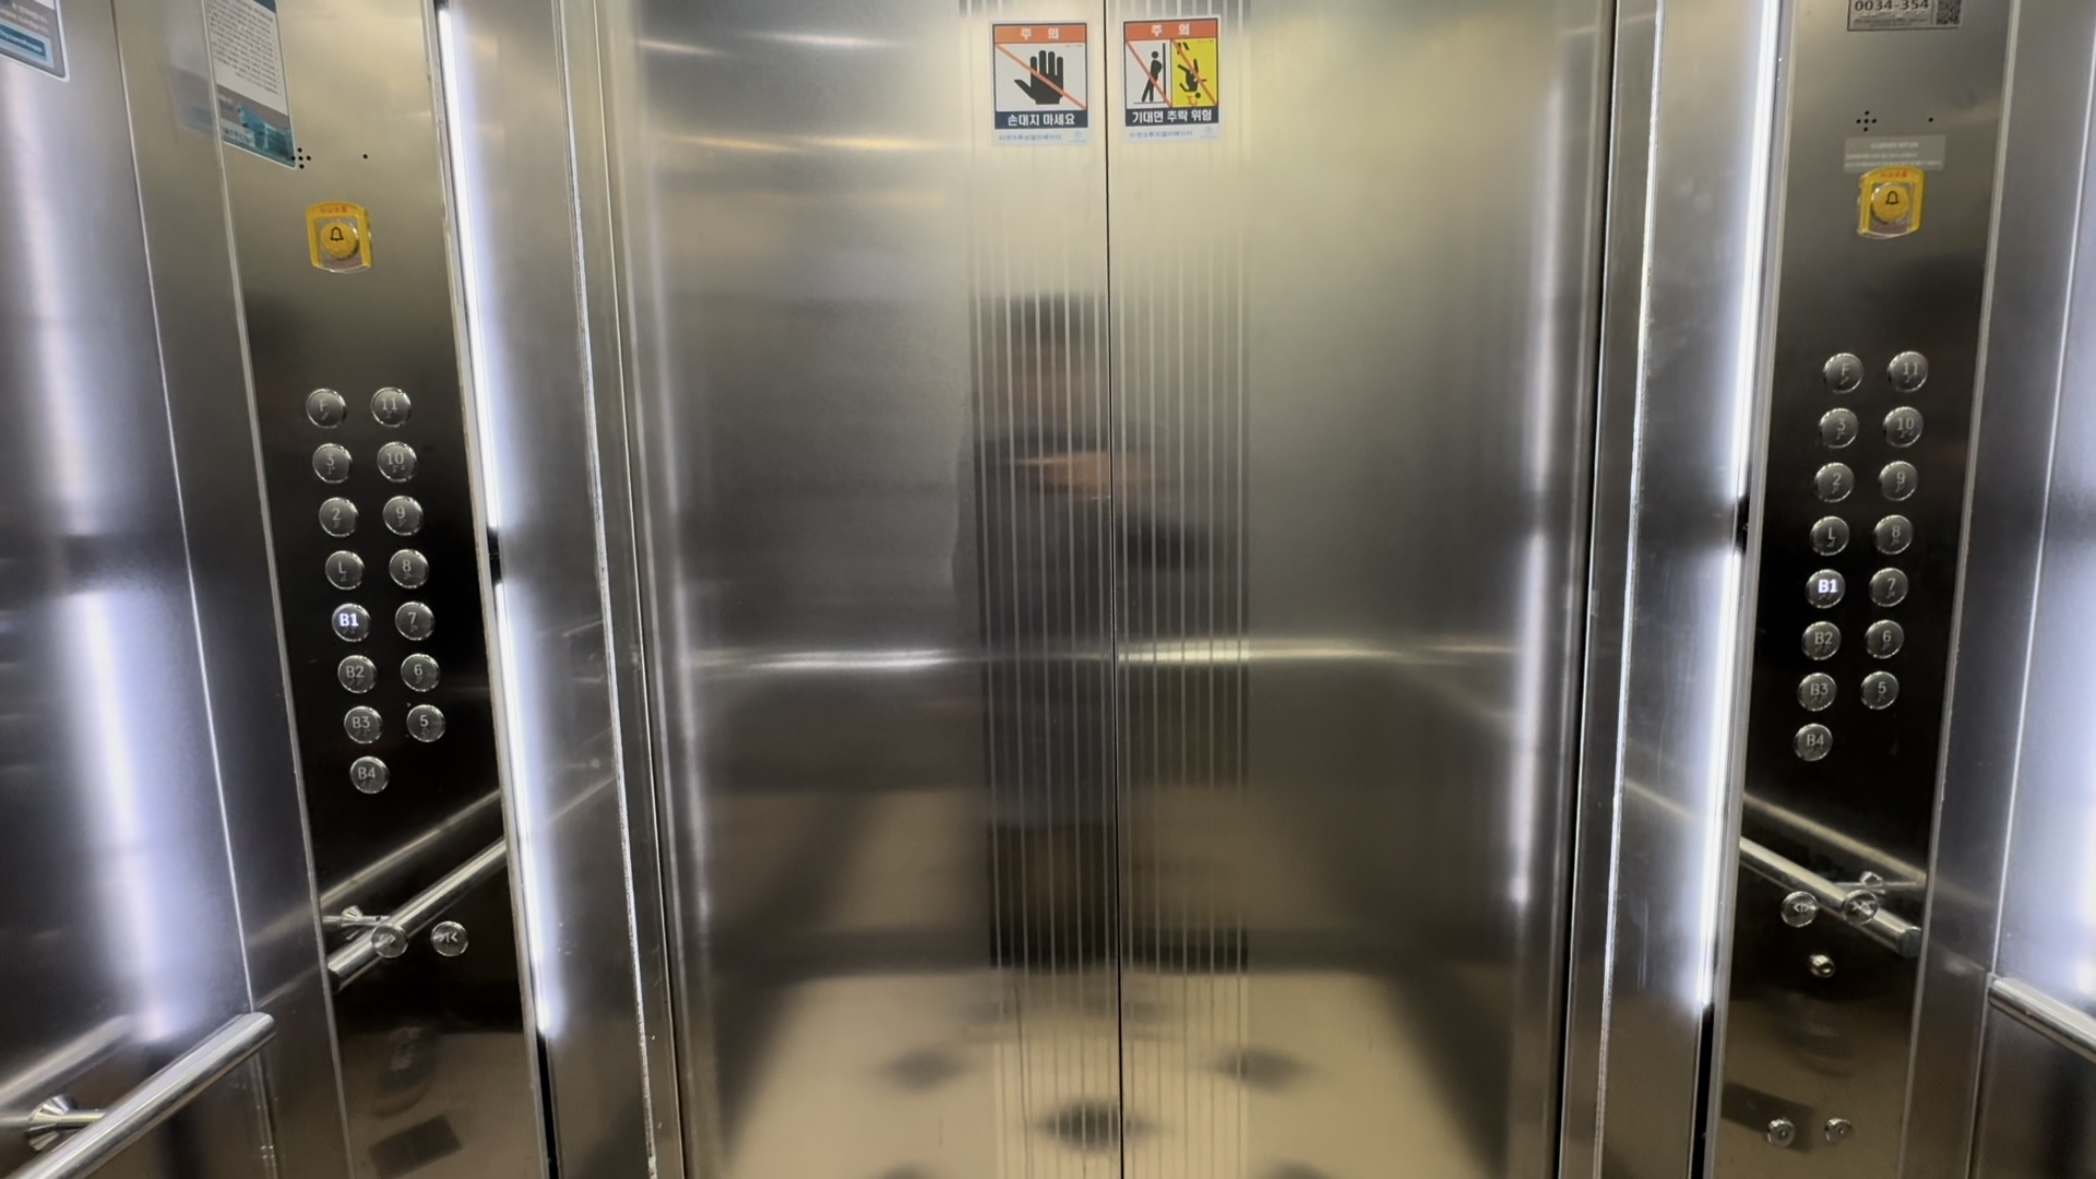

In [13]:
image_dir_file = "images/space-share-samsung-station-center-elevator.png"
IPython.display.Image(filename=image_dir_file, width=450)

In [14]:
questions="""Questions:
  - When is the moment in the image happening in the video? Provide a timestamp.
  - What is the context of the moment and what does the narrator say about it?"""

prompt = f"""
  Look through each frame in the video carefully and answer the questions.
  Only base your answers strictly on what information is available in the attached video.
  Do not make up any information that is not part of the video.
  Be concise and to the point.

  {questions}
"""
#print(prompt)

In [15]:
image_file_path = f"{bucket}/{image_dir_file}"
image_file_uri  = f"gs://{image_file_path}"
image_file      = Part.from_uri(image_file_uri, mime_type="image/png")

video_file_uri  = f"gs://{video_file_path}"
video_file      = Part.from_uri(video_file_uri, mime_type="video/mov")

In [16]:
contents = [video_file, image_file, prompt]
response = model.generate_content(contents)
print(response.text)

Sure, here are the answers to your questions.


**Moment 1** 
- Timestamp: 0:23
- Context: The narrator is showing the viewer what his video will be tested on. He is talking about Gemini 1.5.
- Narration: “제미나 1.5를 테스트하는 데모에서 사용하게 될 비디오를 찍으러 왔습니다.”


**Moment 2**
- Timestamp: 0:37
- Context: The narrator is filming a tall skyscraper.
- Narration: “저도 오늘 찍은 비디오에 대해서 제미나이가 얼마나 잘 이해할지에 대해서는 알 수가 없습니다. 그래도 제가 직접 만든 비디오로 제미나이가 얼마나 잘 이해하는지에 대해서 실제로 볼 수 있기 때문에 굉장히 기대가 됩니다.”


**Moment 3**
- Timestamp: 1:13
- Context: The narrator is on the Seoul subway. The digital display shows he is at the Samseong World Trade Center Seoul station.
- Narration: “삼성역에서 활표장으로 먼저 한번 가 보도록 하겠습니다.”


**Moment 4**
- Timestamp: 2:11
- Context: The narrator gives the address of the presentation venue.
- Narration: “가는 곳은 스페이스쉐어 삼성역 지점이 되겠습니다. 내일 발표 장소를 확인할 겸 그리고 데모를 찍을 겸 해서 찍어 봤습니다.”


**Moment 5**
- Timestamp: 3:14
- Context: The narrator is in the Space Share building. He points to Space Share on the directory.
-

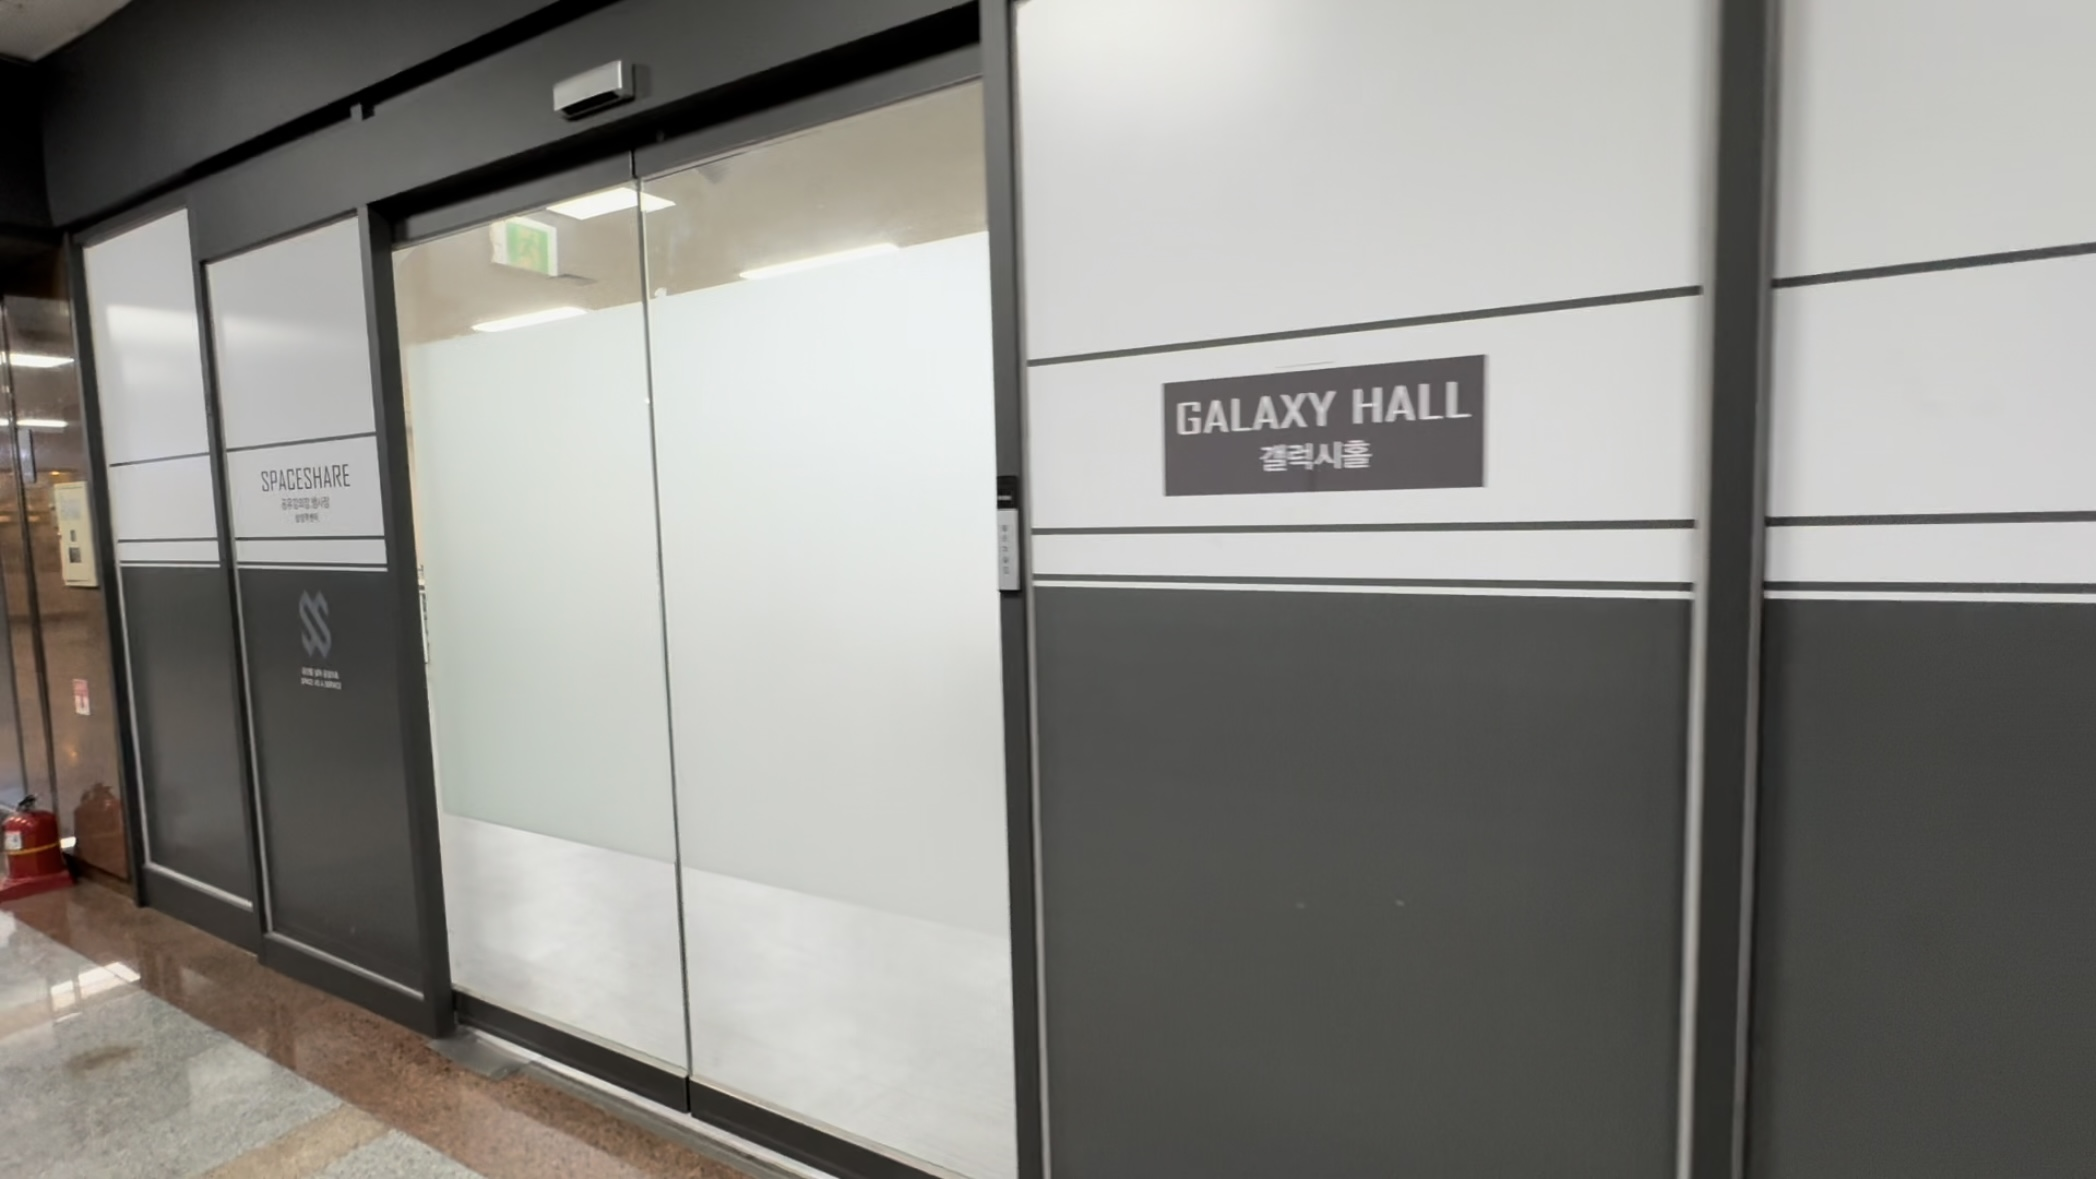

In [17]:
image_dir_file = "images/space-share-samsung-station-center-galaxy-hall.png"
IPython.display.Image(filename=image_dir_file, width=450)

In [18]:
image_file_path = f"{bucket}/{image_dir_file}"
image_file_uri  = f"gs://{image_file_path}"
image_file      = Part.from_uri(image_file_uri, mime_type="image/png")

video_file      = Part.from_uri(video_file_uri, mime_type="video/mov")

In [19]:
contents = [video_file, image_file, prompt]
response = model.generate_content(contents)
print(response.text)

Sure, here are the answers to your questions:

- Timestamp: 03:45
- Context: The narrator has arrived at the location where he will make a presentation the next day and films himself looking at the conference room. He says: "This is the room I'll make my presentation tomorrow, I think. Let me see if it will open."  The door doesn’t open, so he moves closer to look into it.


In [20]:
prompt   = response.text
contents = [prompt]

response = translator_model.generate_content(
    contents,
    generation_config=generation_config,
    safety_settings=safety_settings,
)
print(f"\n{response.text}")


타임스탬프: 03:45

상황: 나레이터는 다음 날 프레젠테이션을 할 장소에 도착하여 회의실을 둘러보며 촬영을 하고 있습니다. 그는 다음과 같이 말합니다. "내일 여기서 발표를 할 것 같아요. 문이 열리는지 볼게요." 문이 열리지 않자 그는 문 안을 들여다보기 위해 더 가까이 다가갑니다.



# 결론
Gemini 1.5 Pro 사용법을 배우셨습니다. Vertex AI SDK를 사용해서 
- 텍스트 이해: 영한 번역
- 비디오 이해
- 멀티모달 이해
- 오디오 분석
등의 작업을 수행했습니다.